In [2]:
from google.colab import files
uploaded = files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata.xlsx


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


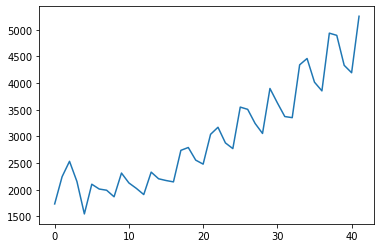

In [6]:
import matplotlib.pyplot as plt
plt.plot(df['Sales'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe28a052160>]],
      dtype=object)

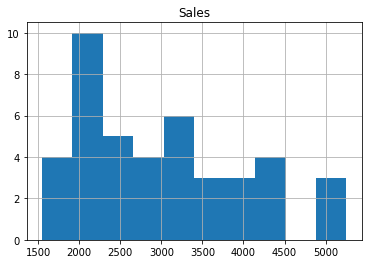

In [7]:
df.hist('Sales')

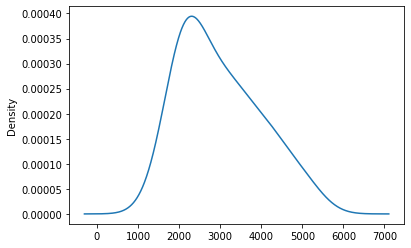

In [8]:
df['Sales'].plot(kind='kde')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


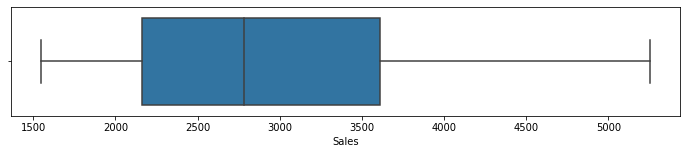

In [9]:
import seaborn as sns
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(df['Sales'], whis=1.5)

<ipython-input-10-1364cc70439b>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sma.tsa.seasonal_decompose(df.Sales, model='additive',freq = 10)


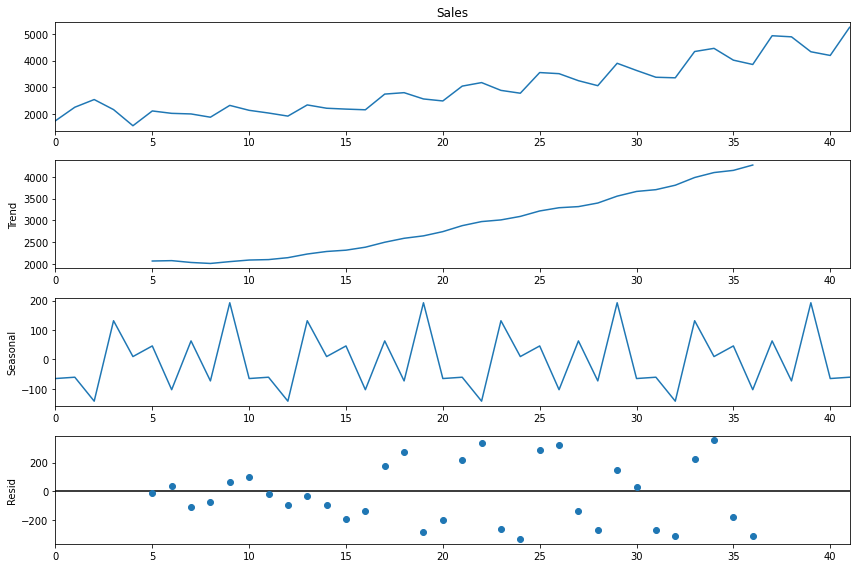

In [10]:
from pylab import rcParams
import statsmodels.api as sma
rcParams['figure.figsize'] = 12,8
decomposition = sma.tsa.seasonal_decompose(df.Sales, model='additive',freq = 10)
fig = decomposition.plot()
plt.show()

<ipython-input-11-cf2d00a0450d>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sma.tsa.seasonal_decompose(df.Sales, model='multiplicative',freq = 10)


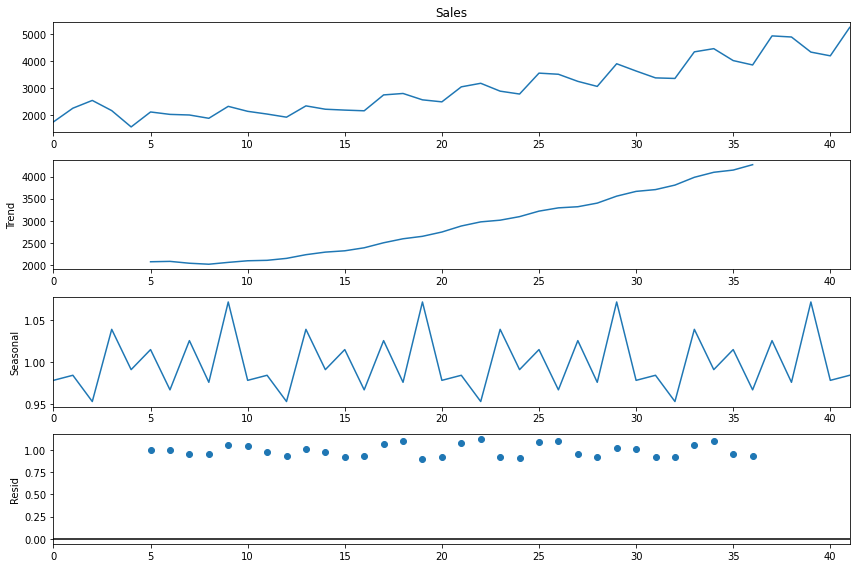

In [11]:
decomposition = sma.tsa.seasonal_decompose(df.Sales, model='multiplicative',freq = 10)
fig = decomposition.plot()
plt.show()

In [12]:
train_len = 34
train = df[0:train_len]
test = df[34:]

In [14]:
train.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [15]:
test.head()

,Quarter,Sales
34,Q3_94,4461.0
35,Q4_94,4017.0
36,Q1_95,3854.0
37,Q2_95,4936.0
38,Q3_95,4895.0


In [16]:
y_hat_naive = test.copy()
y_hat_naive.head()

,Quarter,Sales
34,Q3_94,4461.0
35,Q4_94,4017.0
36,Q1_95,3854.0
37,Q2_95,4936.0
38,Q3_95,4895.0


In [17]:
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1]

In [18]:
y_hat_naive.head()

,Quarter,Sales,naive_forecast
34,Q3_94,4461.0,4342.0
35,Q4_94,4017.0,4342.0
36,Q1_95,3854.0,4342.0
37,Q2_95,4936.0,4342.0
38,Q3_95,4895.0,4342.0


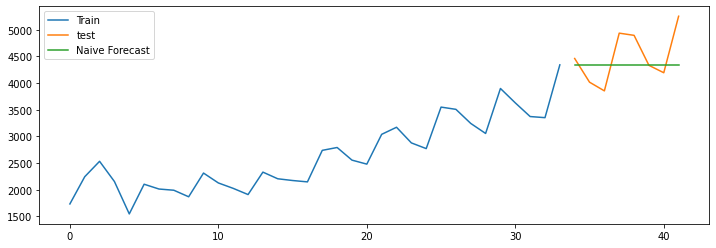

In [19]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.show()

In [20]:
y_hat_avg = test.copy()

In [21]:
y_hat_avg['avg_forecast'] = train['Sales'].mean()

In [22]:
y_hat_avg.head()

,Quarter,Sales,avg_forecast
34,Q3_94,4461.0,2641.759968
35,Q4_94,4017.0,2641.759968
36,Q1_95,3854.0,2641.759968
37,Q2_95,4936.0,2641.759968
38,Q3_95,4895.0,2641.759968


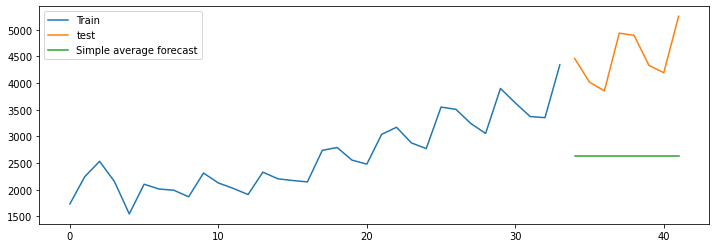

In [23]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
rmse

483.28

In [25]:
mape = round(np.mean(np.abs((test['Sales'] - y_hat_naive['naive_forecast'])/test['Sales'])*100),2)
mape

8.48

In [26]:
results = pd.DataFrame({'Method':['Naive method'], 'RMSE':[rmse], 'MAPE':[mape]})
results

,Method,RMSE,MAPE
0,Naive method,483.28,8.48


In [27]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
rmse

1907.2

In [28]:
mape = round(np.mean(np.abs((test['Sales'] - y_hat_avg['avg_forecast'])/test['Sales'])*100),2)
mape

40.59

In [29]:
results = results.append({'Method':'Simple average method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,483.28,8.48
1,Simple average method,1907.20,40.59


In [30]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(smoothing_level = 0.2, optimized=False)
model_fit.params

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 1734.8269996643066,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [31]:
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(8)

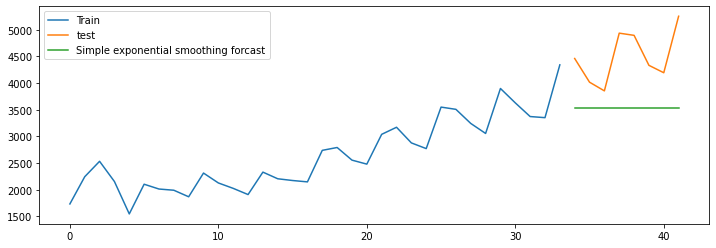

In [32]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [33]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
rmse

1067.41

In [34]:
mape = round(np.mean(np.abs((test['Sales'] - y_hat_ses['ses_forecast'])/test['Sales'])*100),2)
mape

20.63

In [35]:
results = results.append({'Method':'Simple expenential smoothing method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,483.28,8.48
1,Simple average method,1907.20,40.59
2,Simple expenential smoothing method,1067.41,20.63


In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_ES= ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=12) #add the trend to the model
model_ES_fit = model_ES.fit(smoothing_level=0.1, smoothing_slope=0.2)
model_ES_fit.params

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-36-de577da3ab28>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_ES_fit = model_ES.fit(smoothing_level=0.1, smoothing_slope=0.2)


{'smoothing_level': 0.1,
 'smoothing_trend': 0.2,
 'smoothing_seasonal': 0.6109205638246827,
 'damping_trend': nan,
 'initial_level': 2019.588150424011,
 'initial_trend': 7.4028017078537705,
 'initial_seasons': array([-382.14200429,  121.37697352,  326.67484703,   -5.31091604,
        -525.91369958,   26.64912448,  -87.51691528, -179.68828472,
        -314.72235688,  147.51634333,  -39.94050125, -211.0935832 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [37]:
y_hat_es = test.copy()
y_hat_es['es_forecast'] = model_ES_fit.forecast(8)

In [38]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_es['es_forecast'])).round(2)
rmse

278.69

In [39]:
mape = round(np.mean(np.abs((test['Sales'] - y_hat_es['es_forecast'])/test['Sales'])*100),2)
mape

4.71

In [40]:
results = results.append({'Method':'expenential smoothing with additive seasonality ,additive trend', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,483.28,8.48
1,Simple average method,1907.20,40.59
2,Simple expenential smoothing method,1067.41,20.63
3,expenential smoothing with additive seasonalit...,278.69,4.71


In [41]:
model_ES_mu_ad= ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=12) #add the trend to the model
model_ES_mu_ad_fit = model_ES_mu_ad.fit(smoothing_level=0.1, smoothing_slope=0.2)
model_ES_mu_ad_fit.params

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-63bbdcf6cd63>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_ES_mu_ad_fit = model_ES_mu_ad.fit(smoothing_level=0.1, smoothing_slope=0.2)


{'smoothing_level': 0.1,
 'smoothing_trend': 0.2,
 'smoothing_seasonal': 0.5638370965348893,
 'damping_trend': nan,
 'initial_level': 2139.143352603914,
 'initial_trend': 40.03575633684562,
 'initial_seasons': array([0.89068379, 1.08060506, 1.18451173, 1.00740209, 0.79296474,
        1.01630421, 0.9536419 , 0.93110685, 0.87374781, 1.08158134,
        0.99494715, 0.94751606]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [42]:
y_hat_es_mu_ad = test.copy()
y_hat_es_mu_ad['es_mu_ad_forecast'] = model_ES_mu_ad_fit.forecast(8)

In [43]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_es_mu_ad['es_mu_ad_forecast'])).round(2)
rmse

235.17

In [44]:
mape = round(np.mean(np.abs((test['Sales'] - y_hat_es_mu_ad['es_mu_ad_forecast'])/test['Sales'])*100),2)
mape

4.87

In [45]:
results = results.append({'Method':'expenential smoothing with multilicative seasonality ,additive trend', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,483.28,8.48
1,Simple average method,1907.20,40.59
2,Simple expenential smoothing method,1067.41,20.63
3,expenential smoothing with additive seasonalit...,278.69,4.71
4,expenential smoothing with multilicative seaso...,235.17,4.87
